#### market.csv 
- ;으로 구분된 데이터
- excel 열기: 빈 파일 상태에서 open으로 열기 ;으로 구분해서 열기

In [2]:
import pandas as pd
df = pd.read_csv('Data/market.csv', sep=';')
df.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13668\644495098.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/market.csv', sep=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
df.shape

(522064, 7)

In [4]:
df.Price = df.Price.str.replace(",",".")
df.Price = df.Price.astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
df.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom


In [7]:
# 오늘 날짜 가정
import datetime
today = '2012-01-01'
today = pd.to_datetime(today)
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom


In [8]:
# RFM 분석
# Recency 최근성
# Frequency 구매 빈도
# Monetary 구매 금액

# 최근 구매일자
rec_table = df.groupby(['CustomerID']).agg({"Date": lambda x:((today-x.max()).days)})
rec_table.columns = ['Recency']
rec_table.head(3)

,Recency
CustomerID,
12346.0,347
12347.0,61
12349.0,40


In [9]:
# 구매횟수
freq_table = df.drop_duplicates(subset="BillNo").groupby(['CustomerID'])[['BillNo']].count()
freq_table.columns = ['Frequency']
freq_table.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12349.0,1
12350.0,1
12352.0,8


In [10]:
# 구매 금액
df['Total_Price'] = df['Quantity'] * df['Price']
df.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00


In [11]:
# 고객별 구매금액 합계
monetary_table = df.groupby(['CustomerID'])[['Total_Price']].sum()
monetary_table.columns = ['Monetary']
monetary_table.head(3)

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55


In [12]:
# RFM 데이터 정리
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head(3)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,61,7,4310.00
12349.0,40,1,1757.55


In [17]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,4297.000000,4297.000000,4297.000000
mean,126.545264,4.227368,1993.140888
std,115.234387,7.091298,8588.143093
min,21.000000,1.000000,0.000000
25%,43.000000,1.000000,306.720000
50%,82.000000,2.000000,668.580000
75%,183.000000,5.000000,1652.580000
max,718.000000,210.000000,280206.020000


In [19]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)
rfm_scaled[:5]

array([[ 1.91332117, -0.45516961,  8.75616638],
       [-0.56886572,  0.39103625,  0.26980556],
       [-0.75112419, -0.45516961, -0.0274353 ],
       [ 1.78313654, -0.45516961, -0.19316561],
       [-0.28245954,  0.53207056,  0.05972872]])

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

Text(0.5, 1.0, 'KMeans - Elbow')

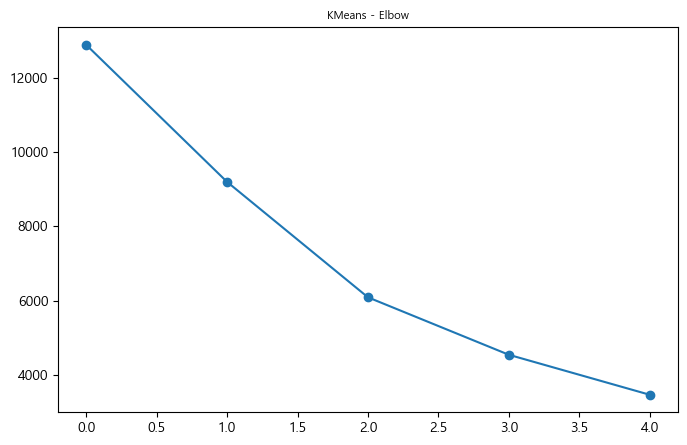

In [22]:
# 엘보우포인트 찾기 
import matplotlib.pyplot as plt
import numpy as np

inertia = []
from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters=i)   # 군집수
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(inertia, marker = 'o')
plt.title("KMeans - Elbow", fontsize=8)

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)
rfm_data['Cluster_No'] = (kmeans.labels_ +1)    # 모델에서는 kmeans.labels_: 0,1,2 이므로 +1 해서 출력)
rfm_data.head(3)

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.60,1
12347.0,61,7,4310.00,3
12349.0,40,1,1757.55,3


In [24]:
# 군집별 RFM 확인
rfm_data.groupby(['Cluster_No'])[['Recency','Frequency','Monetary']].mean()

# 클러스터1: 프리미엄 고객, 구매금액이 크고 최근에 구매한 이력이 있음. 단골
# 클러스터2: 최근 구매일자 이력이 없는 고객, 마케팅이 필요함. 주타겟층으로 삼아볼까?
# 클러스터3: 중간 레벨의 고객

,Recency,Frequency,Monetary
Cluster_No,,,
1,48.760000,58.960000,81979.682000
2,281.745299,1.545299,495.484189
3,68.634429,4.797872,1913.384218


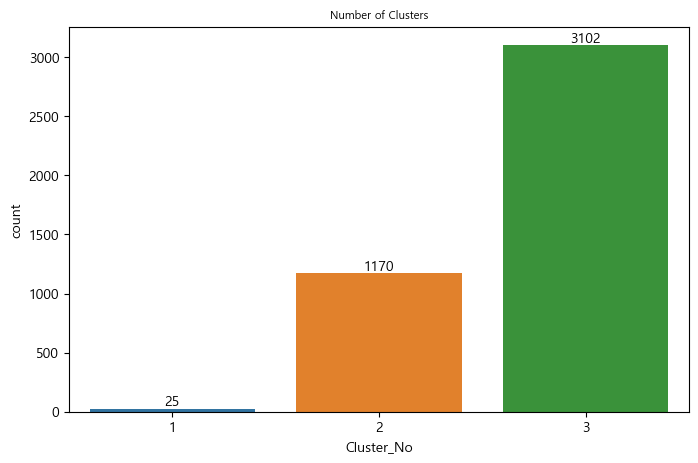

In [25]:
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.countplot(x = rfm_data.Cluster_No)
plt.title("Number of Clusters", fontsize=8)
for bars in ax.containers:
    ax.bar_label(bars)
    

In [26]:
# unstack() 좌에서 우로 쌓아감
# stack은 아래에서 위로 계속 쌓아감 
data_apr = df.groupby(['BillNo', 'Itemname'])[['Quantity']].sum().unstack().reset_index().fillna(0).set_index('BillNo')
data_apr.head(3)

Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                     0.0                     0.0                    0.0   
536366                     0.0                     0.0                    0.0   
536367                     0.0                     0.0                    0.0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                          0.0                       0.0   
536366                          0.0                       0.0   
536367                          0.0                       0.0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                         0.0                          0.0   
536366                         0.0                          0.0   
536367                         0.0                          0.0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                0.0                             0.0   
536366                                0.0                             0.0   
536367                                0.0                             0.0   

                                        ...                      \
Itemname 12 PENCIL SMALL TUBE WOODLAND  ... wrongly coded 20713   
BillNo                                  ...                       
536365                             0.0  ...                 0.0   
536366                             0.0  ...                 0.0   
536367                             0.0  ...                 0.0   

                                                                 \
Itemname wrongly coded 23343 wrongly coded-23343 wrongly marked   
BillNo                                                            
536365                   0.0                 0.0            0.0   
536366                   0.0                 0.0            0.0   
536367                   0.0                 0.0            0.0   

                                                           \
Itemname wrongly marked 23343 wrongly marked carton 22804   
BillNo                                                      
536365                    0.0                         0.0   
536366                    0.0                         0.0   
536367                    0.0                         0.0   

                                                                    \
Itemname wrongly marked. 23343 in box wrongly sold (22719) barcode   
BillNo                                                               
536365                            0.0                          0.0   
536366                            0.0                          0.0   
536367                            0.0                          0.0   

                                                 
Itemname wrongly sold as sets wrongly sold sets  
BillNo                                           
536365                    0.0               0.0  
536366                    0.0               0.0  
536367                    0.0               0.0  

[3 rows x 4185 columns]

In [14]:
df.groupby(['BillNo', 'Itemname'])[['Quantity']].sum().stack()

BillNo   Itemname                                     
536365   CREAM CUPID HEARTS COAT HANGER       Quantity    8
         GLASS STAR FROSTED T-LIGHT HOLDER    Quantity    6
         KNITTED UNION FLAG HOT WATER BOTTLE  Quantity    6
         RED WOOLLY HOTTIE WHITE HEART.       Quantity    6
         SET 7 BABUSHKA NESTING BOXES         Quantity    2
                                                         ..
572058   VINTAGE UNION JACK BUNTING           Quantity    1
         WHITE BAROQUE WALL CLOCK             Quantity    1
A563185  Adjust bad debt                      Quantity    1
A563186  Adjust bad debt                      Quantity    1
A563187  Adjust bad debt                      Quantity    1
Length: 509829, dtype: int64

In [28]:
def num(x):
    if x<=0:
        return 0
    elif x>=1:
        return 1
basket_new = data_apr.applymap(num)
basket_new.nunique()

          Itemname                    
Quantity  *Boombox Ipod Classic           2
          *USB Office Mirror Ball         2
          10 COLOUR SPACEBOY PEN          2
          12 COLOURED PARTY BALLOONS      2
          12 DAISY PEGS IN WOOD BOX       2
                                         ..
          wrongly marked carton 22804     1
          wrongly marked. 23343 in box    1
          wrongly sold (22719) barcode    2
          wrongly sold as sets            1
          wrongly sold sets               1
Length: 4185, dtype: int64

In [29]:
# support   # 오래걸림

from mlxtend.frequent_patterns import apriori
apr = apriori(basket_new, min_support = 0.02, use_colnames = True)
        # support      구매비율       전체대비 특정아이템 A 구매 비율     0.02 이상인 것들을 모두 출력
        # confidence   연관구매비율   A를 산 사람이 B를 산 비율
        # lift         상관관계비율   >1 양의상관관계, <1 음의상관관계
apr.sort_values(by = "support", ascending = False)

c:\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
263,0.108956,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))"
97,0.102128,"((Quantity, JUMBO BAG RED RETROSPOT))"
190,0.094211,"((Quantity, REGENCY CAKESTAND 3 TIER))"
151,0.081940,"((Quantity, PARTY BUNTING))"
122,0.076249,"((Quantity, LUNCH BAG RED RETROSPOT))"
...,...,...
274,0.020139,"((Quantity, WOODEN UNION JACK BUNTING))"
245,0.020139,"((Quantity, STRAWBERRY SHOPPER BAG))"
219,0.020139,"((Quantity, SET OF 60 I LOVE LONDON CAKE CASES))"
195,0.020040,"((Quantity, RIBBON REEL STRIPES DESIGN))"


In [30]:
# association_rule, lift기준 
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apr, metric = "lift", min_threshold = 1)
rules.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
154,"((Quantity, PINK REGENCY TEACUP AND SAUCER), (...","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659,0.974077
152,"((Quantity, GREEN REGENCY TEACUP AND SAUCER), ...","((Quantity, ROSES REGENCY TEACUP AND SAUCER))",0.029936,0.050124,0.025482,0.851240,16.982778,0.023982,6.385280,0.970159
25,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.036418,0.048243,0.029936,0.822011,17.038810,0.028179,5.347273,0.976886
160,"((Quantity, JUMBO BAG PINK POLKADOT), (Quantit...","((Quantity, JUMBO BAG RED RETROSPOT))",0.025433,0.102128,0.020386,0.801556,7.848573,0.017789,4.524572,0.895360
138,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER))",0.036418,0.050124,0.028204,0.774457,15.450905,0.026378,4.211500,0.970627
...,...,...,...,...,...,...,...,...,...,...
71,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SKULLS))",0.102128,0.034785,0.020435,0.200097,5.752430,0.016883,1.206665,0.920131
161,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO BAG PINK POLKADOT), (Quantit...",0.102128,0.025433,0.020386,0.199612,7.848573,0.017789,1.217619,0.971840
42,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO BAG ALPHABET))",0.102128,0.043790,0.020336,0.199128,4.547316,0.015864,1.193961,0.868821
131,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))","((Quantity, NATURAL SLATE HEART CHALKBOARD))",0.108956,0.060960,0.020336,0.186649,3.061823,0.013695,1.154532,0.755740


In [31]:
# 한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

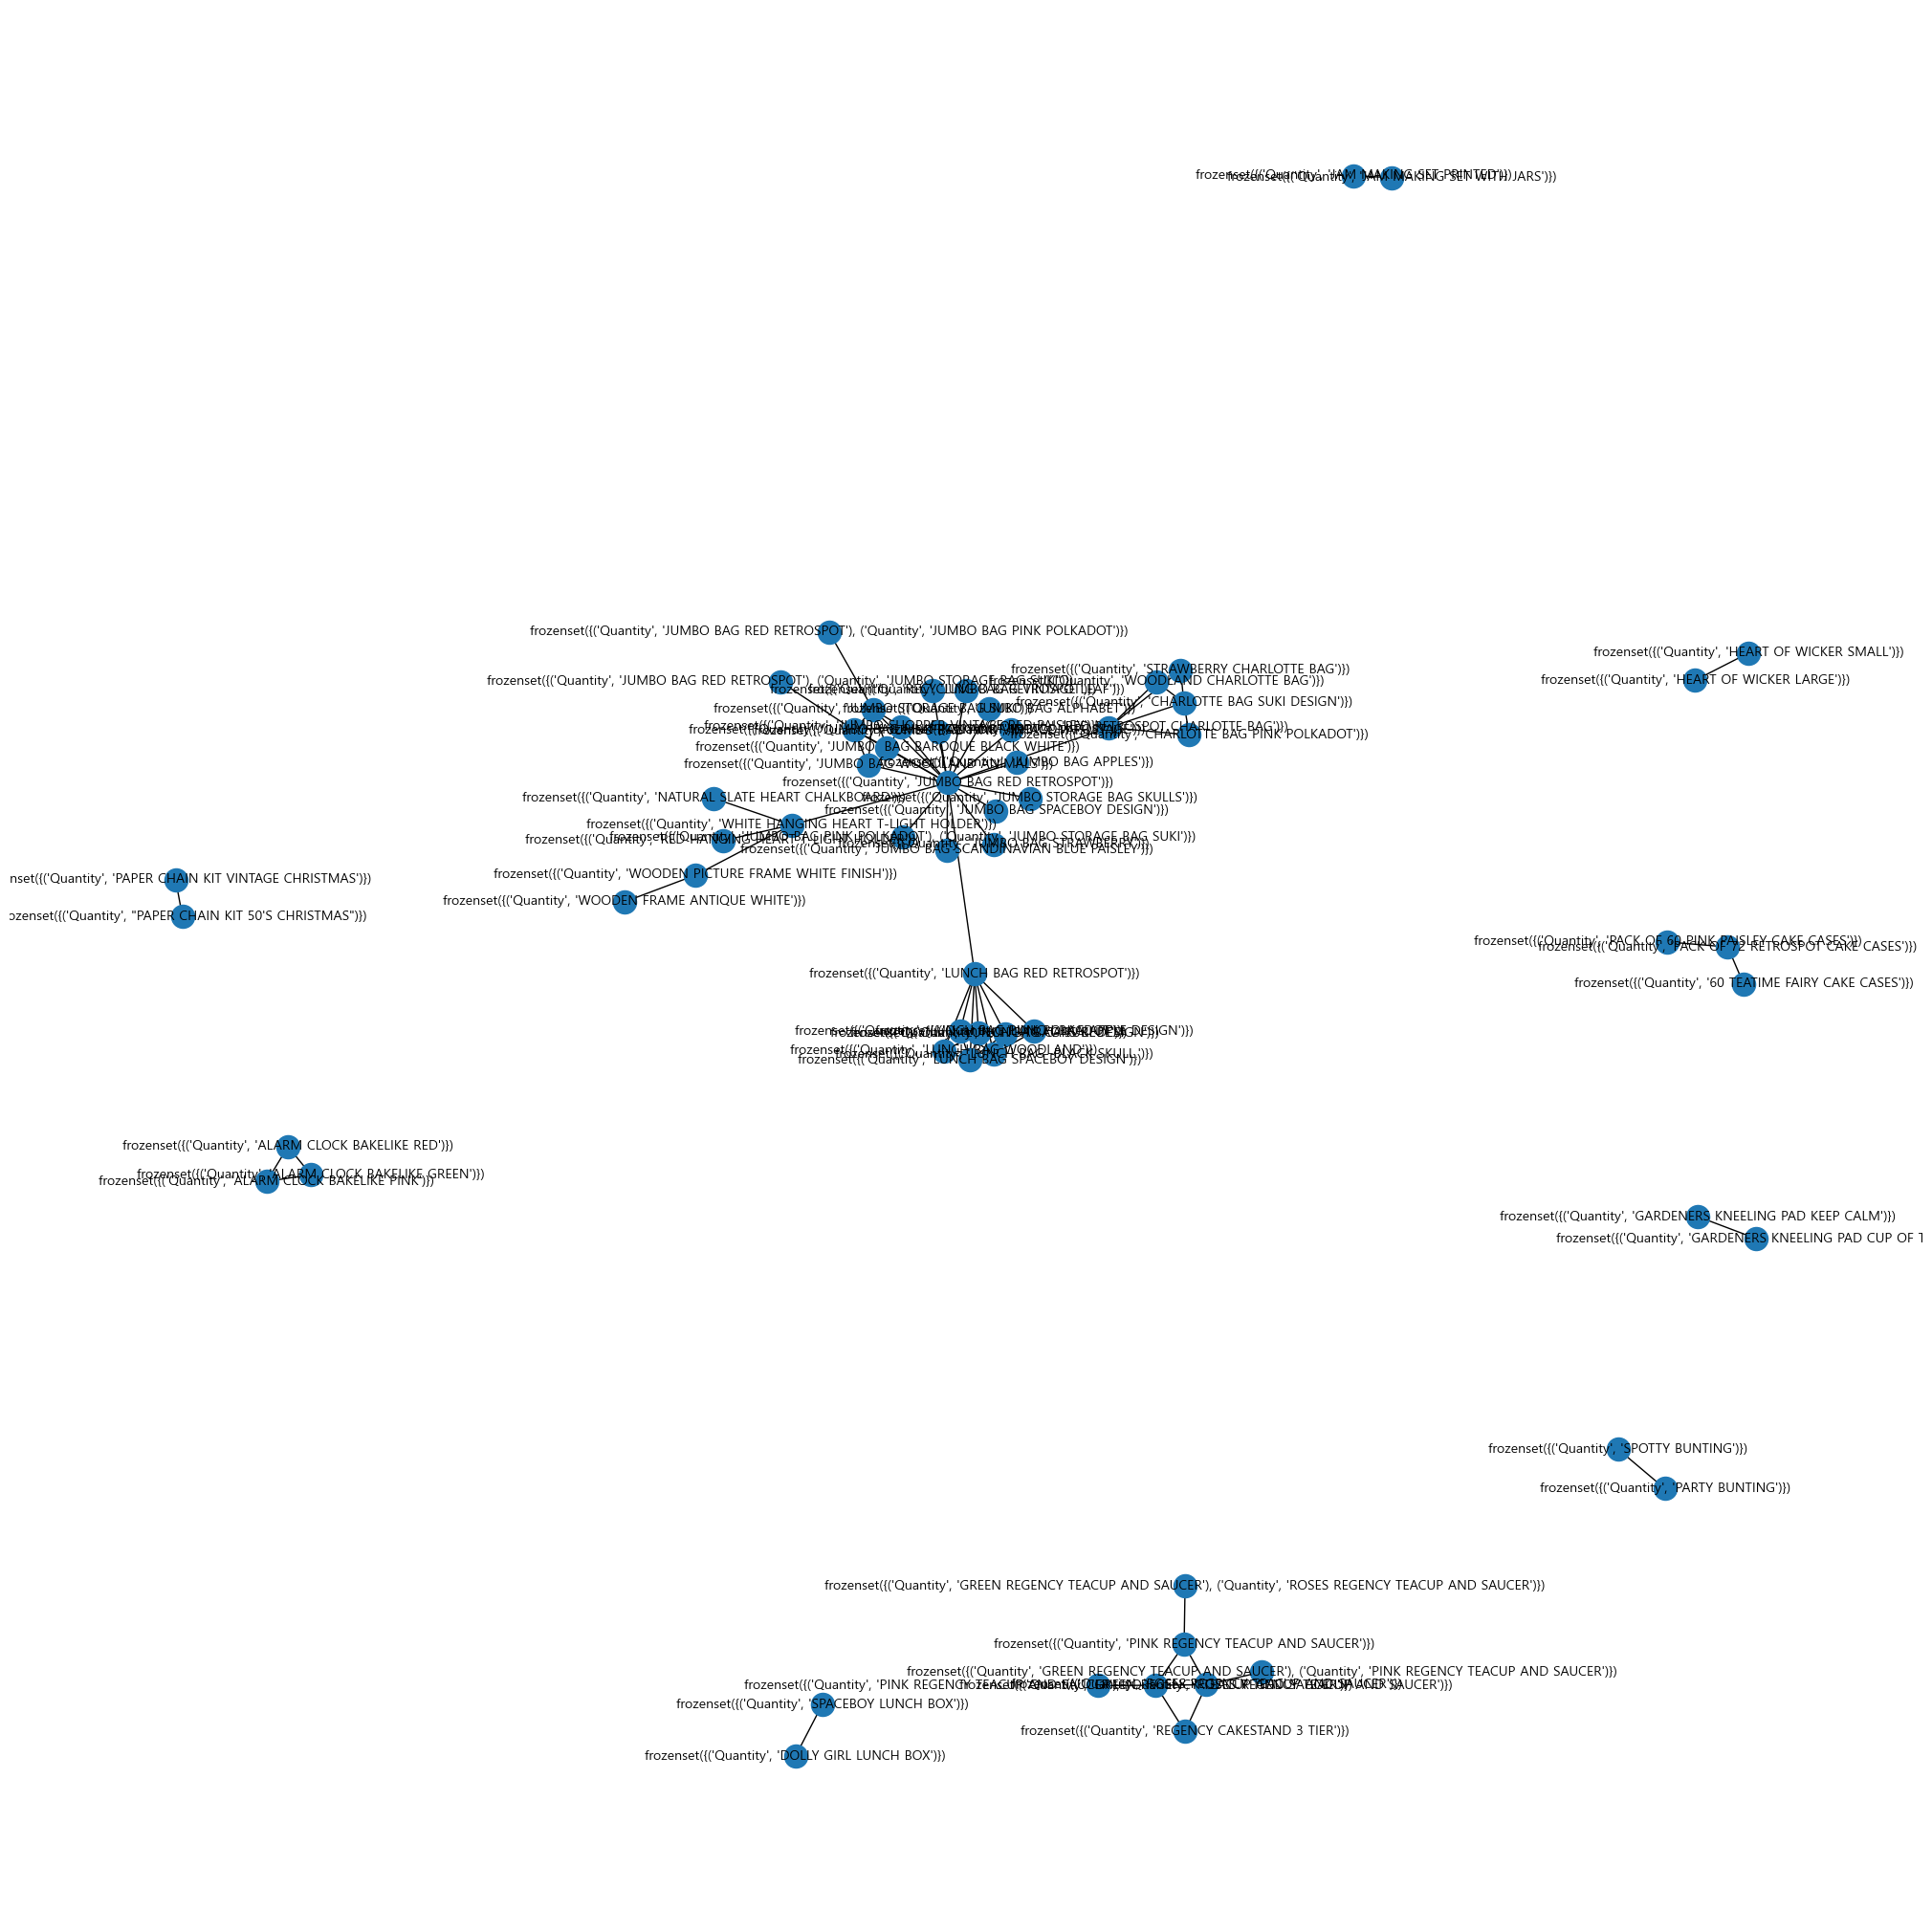

In [36]:
# 선행 antecedentes ~라면 / 결과~이다 consequents
import networkx as nx

plt.figure(figsize = (20,20))
ga = nx.from_pandas_edgelist(rules, source='antecedents', target = 'consequents')
nx.draw(ga, with_labels = True, font_family = font_name, font_size = 10)
# source: 그래프의 안쪽 노드, target: 그래프의 바깥쪽 노드
